![zadanie](tasks/3.png)

In [3]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

N = 12
A = 4
N0 = np.square(np.arange(4)) * N

s0 = A * (1 - (np.arange(N) % N) / N)


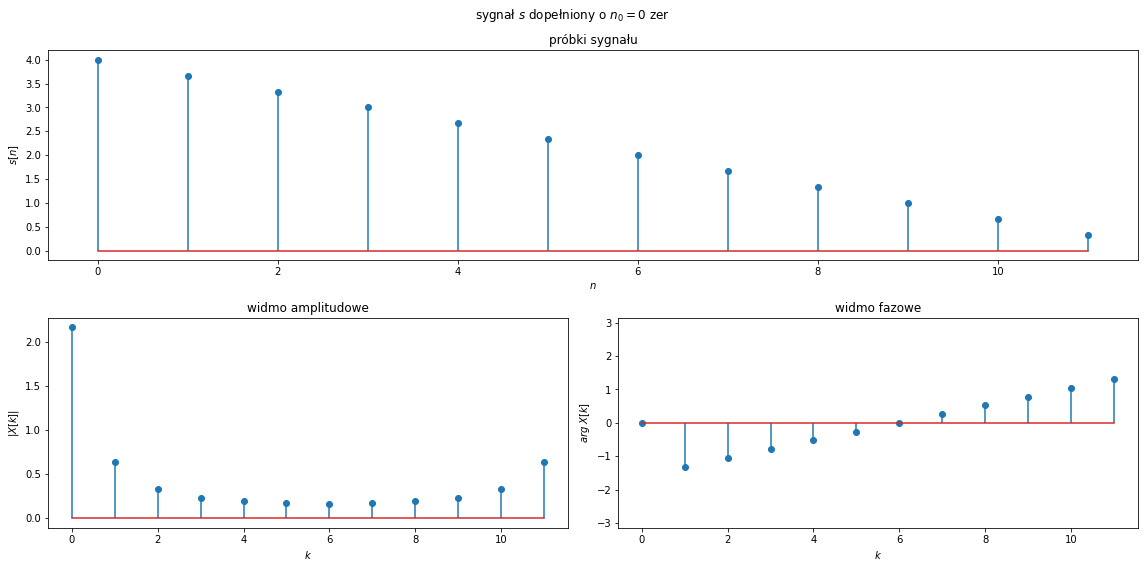

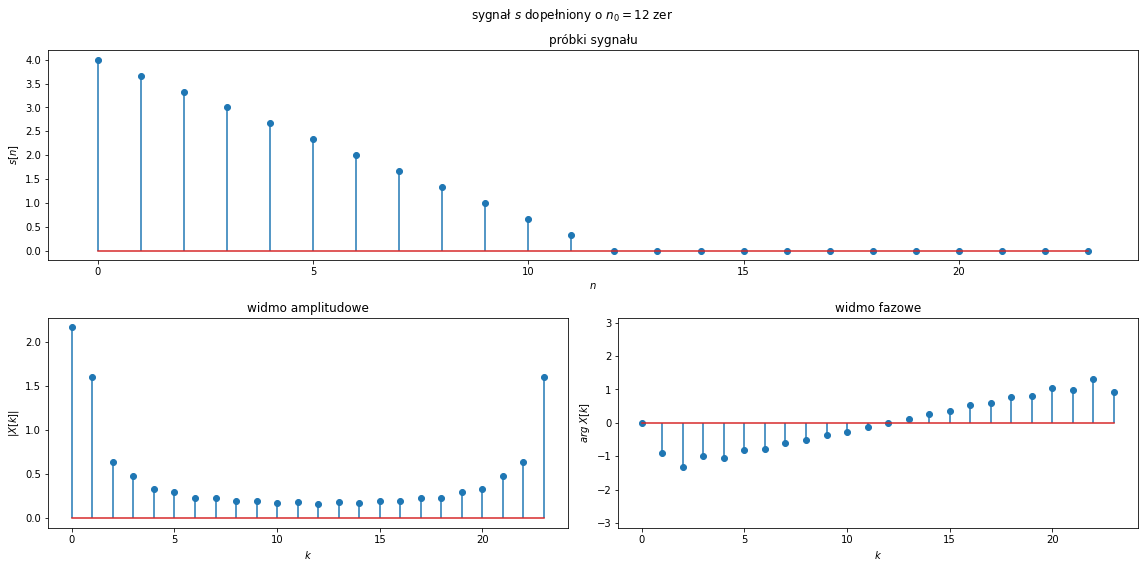

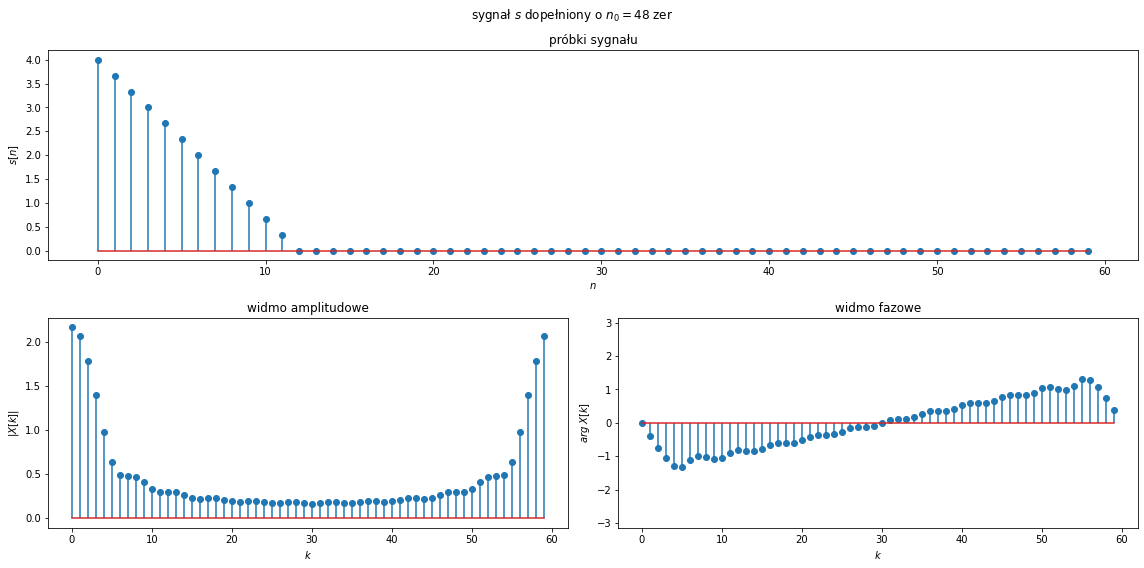

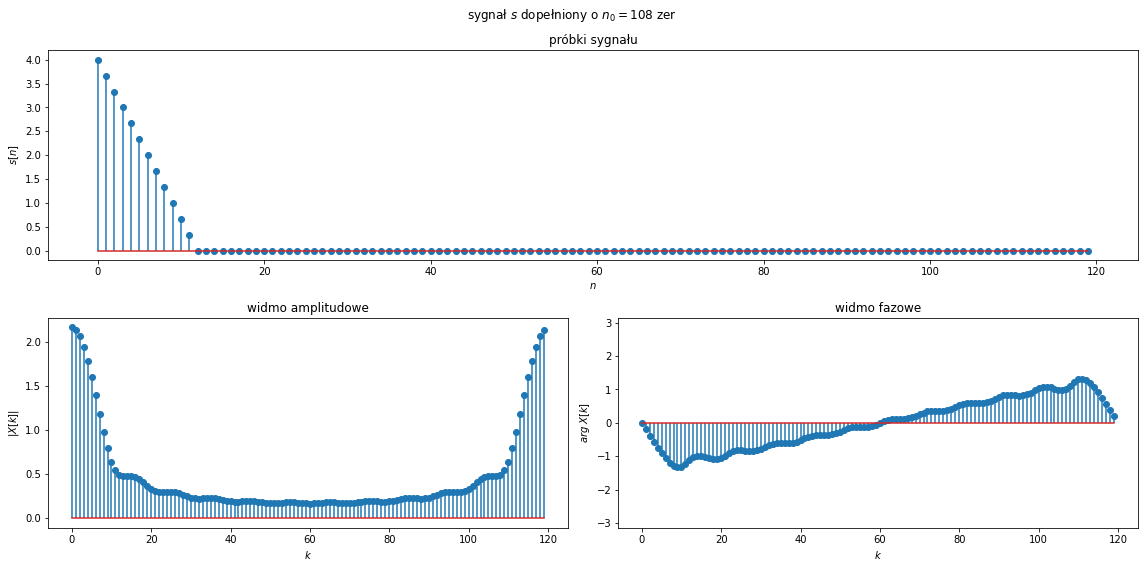

In [4]:
for n0 in N0:
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(f"sygnał $s$ dopełniony o $n_0={n0}$ zer")
    gs = GridSpec(ncols=2, nrows=2, figure=fig)

    ax_s = fig.add_subplot(gs[0, :])
    ax_ampl = fig.add_subplot(gs[1, 0])
    ax_phase = fig.add_subplot(gs[1, 1])

    s = np.concatenate((s0, np.zeros(n0)))

    ax_s.stem(s)
    ax_s.set_title("próbki sygnału")
    ax_s.set_xlabel("$n$")
    ax_s.set_ylabel("$s[n]$")

    s_fft = np.fft.fft(s) / N
    s_amplitude_spectrum = np.abs(s_fft)
    s_phase_spectrum = np.angle(s_fft)

    ax_ampl.stem(s_amplitude_spectrum)
    ax_ampl.set_title("widmo amplitudowe")
    ax_ampl.set_xlabel("$k$")
    ax_ampl.set_ylabel("$|X[k]|$")

    ax_phase.stem(s_phase_spectrum)
    ax_phase.set_title("widmo fazowe")
    ax_phase.set_xlabel("$k$")
    ax_phase.set_ylabel("$arg \\; X[k]$")
    ax_phase.set_ylim((-np.pi, np.pi))

    fig.tight_layout()
    plt.show()
    plt.close()


Obserwacje:
* dopełnienie sygnału zerami nie zmienia ogólnego kształtu obu widm, a jedynie zwiększa rozdzielczość w dziedzinie częstotliwości, dodając wartości pośrednie

Zachowanie to wynika ze wzoru na odległość między kolejnymi wyrazami DFT:
$$\Delta f_N = \frac{f_s}{N}$$

Jak widać można ją zmniejszyć poprzez zwiększenie ilości próbek.